 Summary
 1. Introduction
 2. Project Task
 3. Data Source
 4. Data Exploration And Preprocessing
 5. Data Analysis:
 All Modern Olympic Seasons
 First Modern Olympic Season(1896)
 Modern Olympic Seasons hosted in france
 Analysis Report: Modern Olympic Games(1896-2016)

Introduction
 The Olympic Games, a prestigious international sporting event, bring together athletes from around the world to compete in various sports.
 Originating in ancient Greece, the Olympics were revived in the late 19th century, marking the beginning of the modern Olympic era. Held every
 four years, the modern Olympic Games alternate between Summer and Winter editions, showcasing the pinnacle of athletic achievement. This
 project aims to explore key aspects of the modern Olympics, including historical timelines, participation trends, athlete demographics, and
 country performances, providing a comprehensive analysis of their evolution and impact on the global sporting landscape.
 

project Task
 **

 1- List the seasons, years of the modern olympics games, and cities that hosted these games.
 2- Which city hosted the modern olymopics the most?
 3- How has the number of participating athletes evolved over the years?
 4- Which seasons has the http://localhost:8888/notebooks/MyWorkSpace/ML/%20Data%20Analysis%20of%20the%20Olympic%20Games%20with%20Python.ipynb#highest and lowest participation and in which cities were them held?
 5- Which country has won the most total medals and gold medals across all Olympic seasons??
 6- What's the average of age, weight and height by sport and gender across all seasons?
 7- Which sport event was the most popular across all the seasons, and who won the most medals in this sport?
 8 - How many countries and athletes participated in the rst season?
 9- List the different sports and their events on the rst season.
 10- Which country won the most medals , and who won gold medals in the rst season?
 11- What's the average of age, weight and height by sports and gender on the rst modern olympic season?
 12- When were the modern olympics held in France, and in which cities?
 13- How many countries and athletes ( by gender) participated in the modern Olympic games held in each French city, for each season?
 14- Which country won the most medals in France's modern olympic games by season?.
 15- Which sport event was the most popular across all French Olympic seasons, and who won the most gold medals in this event?

 Data Source
 We will use the Kaggle olympic dataset 
Data Exploration and processing
 athlete_events.csv

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
olympics = pd.read_csv("C:/MyWork/CsvFiles/ML_CSV/athlete_events.csv")

In [3]:
olympics.shape # (Rows, Columns)

(271116, 15)

In [4]:
olympics.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN


In [5]:
olympics.tail(3)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN
271115,135571,Tomasz Ireneusz ya,M,34.0,185.0,96.0,Poland,POL,2002 Winter,2002,Winter,Salt Lake City,Bobsleigh,Bobsleigh Men's Four,NaN


In [6]:
olympics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [7]:
olympics.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [8]:
# mode for each columns:
mode_df = olympics.mode()
    
 # Print the mode for each column
for column in mode_df.columns:
    print(f"Mode of column '{column}': {mode_df[column].values}")

Mode of column 'ID': [77710]
Mode of column 'Name': ['Robert Tait McKenzie']
Mode of column 'Sex': ['M']
Mode of column 'Age': [23.]
Mode of column 'Height': [180.]
Mode of column 'Weight': [70.]
Mode of column 'Team': ['United States']
Mode of column 'NOC': ['USA']
Mode of column 'Games': ['2000 Summer']
Mode of column 'Year': [1992]
Mode of column 'Season': ['Summer']
Mode of column 'City': ['London']
Mode of column 'Sport': ['Athletics']
Mode of column 'Event': ["Football Men's Football"]
Mode of column 'Medal': ['Gold']


In [9]:
# duplicated data:
olympics.duplicated().sum()

1385

In [10]:
# missing values:
olympics.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [11]:
# % of missing values:
olympics.isnull().sum()/olympics.shape[0]*100

ID         0.000000
Name       0.000000
Sex        0.000000
Age        3.494445
Height    22.193821
Weight    23.191180
Team       0.000000
NOC        0.000000
Games      0.000000
Year       0.000000
Season     0.000000
City       0.000000
Sport      0.000000
Event      0.000000
Medal     85.326207
dtype: float64

<AxesSubplot: xlabel='Age', ylabel='Count'>

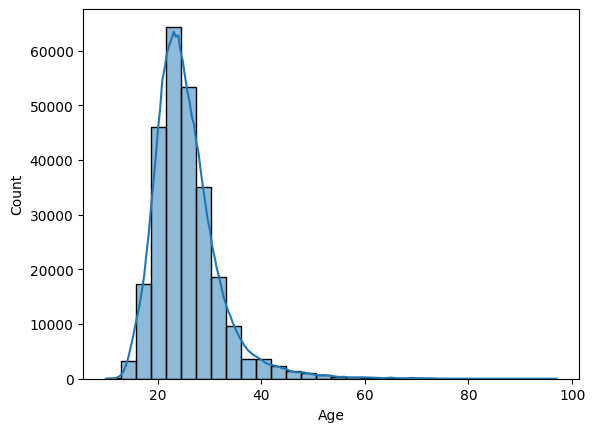

In [12]:
# age distribution:
sns.histplot(olympics['Age'],bins=30, kde=True)

<AxesSubplot: xlabel='Weight', ylabel='Count'>

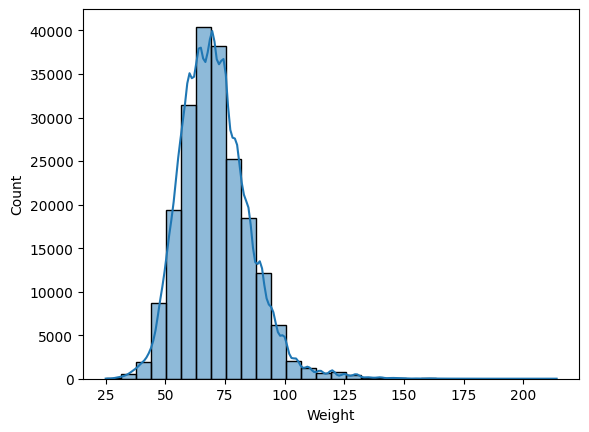

In [13]:
# weight distribution:
sns.histplot(olympics['Weight'],bins=30, kde=True)

In [14]:
# display duplicated rows first 3:
olympics[olympics.duplicated()].head(3)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
1252,704,Dsir Antoine Acket,M,27.0,NaN,NaN,Belgium,BEL,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN
4282,2449,William Truman Aldrich,M,48.0,NaN,NaN,United States,USA,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Painting, Drawings And ...",NaN
4283,2449,William Truman Aldrich,M,48.0,NaN,NaN,United States,USA,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Painting, Drawings And ...",NaN


In [15]:
# Remove Duplicted Data:
olympics.drop_duplicates(inplace = True)

In [16]:
# check the duplicated data:
olympics.duplicated().sum()

0

In [17]:
olympics['Age'].fillna(olympics['Age'].median(), inplace=True)
olympics['Height'].fillna(olympics['Height'].median(), inplace=True)
olympics['Weight'].fillna(olympics['Weight'].mean(), inplace=True)
olympics['Medal'].fillna('0', inplace=True)

In [18]:
olympics.isnull().sum()

ID        0
Name      0
Sex       0
Age       0
Height    0
Weight    0
Team      0
NOC       0
Games     0
Year      0
Season    0
City      0
Sport     0
Event     0
Medal     0
dtype: int64

In [19]:
olympics.describe()

,ID,Age,Height,Weight,Year
count,269731.000000,269731.000000,269731.000000,269731.000000,269731.000000
mean,68264.949591,25.404536,175.265046,70.701778,1978.623073
std,39026.253843,6.062324,9.302366,12.606697,29.752055
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34655.500000,22.000000,170.000000,63.000000,1960.000000
50%,68233.000000,24.000000,175.000000,70.701778,1988.000000
75%,102111.000000,28.000000,180.000000,76.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [20]:
# mode of columns post processing:
 # mode for each columns:
mode_df = olympics.mode()
 # Print the mode for each column
for column in mode_df.columns:
    print(f"Mode of column '{column}': {mode_df[column].values}")

Mode of column 'ID': [106296]
Mode of column 'Name': ['Heikki Ilmari Savolainen']
Mode of column 'Sex': ['M']
Mode of column 'Age': [24.]
Mode of column 'Height': [175.]
Mode of column 'Weight': [70.70177806]
Mode of column 'Team': ['United States']
Mode of column 'NOC': ['USA']
Mode of column 'Games': ['2000 Summer']
Mode of column 'Year': [1992]
Mode of column 'Season': ['Summer']
Mode of column 'City': ['London']
Mode of column 'Sport': ['Athletics']
Mode of column 'Event': ["Football Men's Football"]
Mode of column 'Medal': ['0']


In [21]:
olympics['Season'].unique()

array(['Summer', 'Winter'], dtype=object)

In [22]:
 # olympic years:
olympic_years=olympics["Year"].unique()
olympic_years.sort()
olympic_years

array([1896, 1900, 1904, 1906, 1908, 1912, 1920, 1924, 1928, 1932, 1936,
       1948, 1952, 1956, 1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988,
       1992, 1994, 1996, 1998, 2000, 2002, 2004, 2006, 2008, 2010, 2012,
       2014, 2016], dtype=int64)

In [23]:
# game feature:
game=olympics["Games"].unique()
game.sort()

In [24]:
olympics["Games"].unique()

array(['1992 Summer', '2012 Summer', '1920 Summer', '1900 Summer',
       '1988 Winter', '1992 Winter', '1994 Winter', '1932 Summer',
       '2002 Winter', '1952 Summer', '1980 Winter', '2000 Summer',
       '1996 Summer', '1912 Summer', '1924 Summer', '2014 Winter',
       '1948 Summer', '1998 Winter', '2006 Winter', '2008 Summer',
       '2016 Summer', '2004 Summer', '1960 Winter', '1964 Winter',
       '1984 Winter', '1984 Summer', '1968 Summer', '1972 Summer',
       '1988 Summer', '1936 Summer', '1952 Winter', '1956 Winter',
       '1956 Summer', '1960 Summer', '1928 Summer', '1976 Summer',
       '1980 Summer', '1964 Summer', '2010 Winter', '1968 Winter',
       '1906 Summer', '1972 Winter', '1976 Winter', '1924 Winter',
       '1904 Summer', '1928 Winter', '1908 Summer', '1948 Winter',
       '1932 Winter', '1936 Winter', '1896 Summer'], dtype=object)

In [25]:
olympics['Medal'].value_counts()

0         229959
Gold       13369
Bronze     13295
Silver     13108
Name: Medal, dtype: int64

In [26]:
# years, season, city, athlete number:
all_seasons=olympics.groupby(['Year','Season','City'])['ID'].nunique().reset_index()
all_seasons.head(5)

,Year,Season,City,ID
0,1896,Summer,Athina,176
1,1900,Summer,Paris,1224
2,1904,Summer,St. Louis,650
3,1906,Summer,Athina,841
4,1908,Summer,London,2024


In [27]:
len(all_seasons)

52

In [28]:
 olympics.groupby(['Year','City'])['City'].unique().value_counts().head(5)

TypeError: unhashable type: 'numpy.ndarray'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'numpy.ndarray'


[Athina]       3
[London]       3
[Stockholm]    2
[Paris]        2
[Innsbruck]    2
Name: City, dtype: int64

In [29]:
olympics.groupby(['Year','Sex'])['ID'].nunique().head()

Year  Sex
1896  M       176
1900  F        23
      M      1201
1904  F         6
      M       644
Name: ID, dtype: int64

In [30]:
 ath_number=olympics.groupby(['Year'])['ID'].nunique()

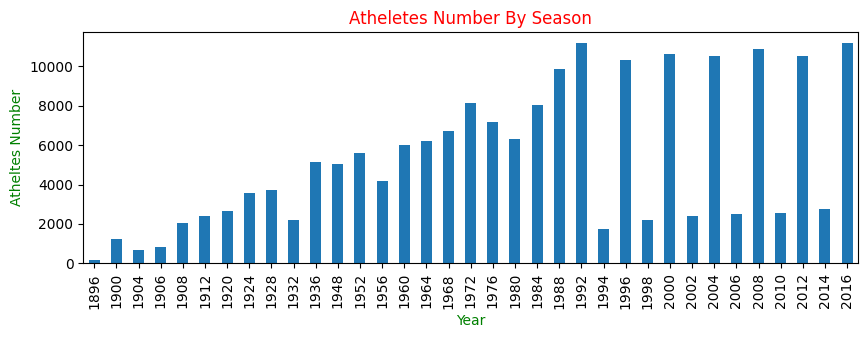

In [31]:
 ath_number.plot(kind='bar', figsize=(10,3))
 plt.title('Atheletes Number By Season',color='red')
 plt.xlabel('Year',color='green')
 plt.ylabel('Atheltes Number',color='green')
 plt.show()

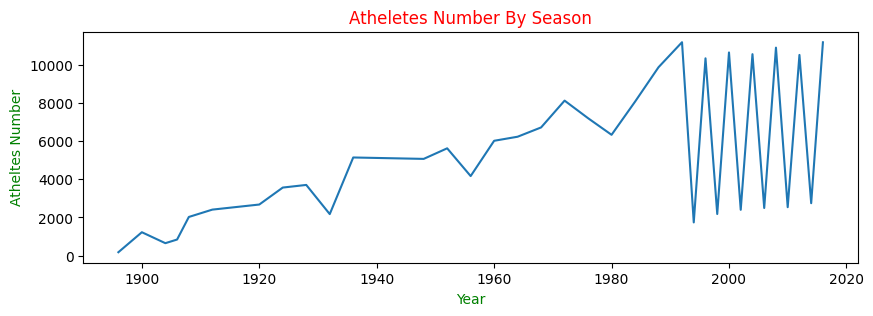

In [33]:
ath_number.plot(kind='line', figsize=(10,3))
plt.title('Atheletes Number By Season',color='red')
plt.xlabel('Year',color='green')
plt.ylabel('Atheltes Number',color='green')
plt.show()

In [35]:
highest_number=olympics.groupby(['Year','Season','City'])['ID'].nunique().sort_values(ascending=False).head(1)
highest_number

Year  Season  City          
2016  Summer  Rio de Janeiro    11179
Name: ID, dtype: int64

In [36]:
lowest_number=olympics.groupby(['Year','Season','City'])['ID'].nunique().sort_values().head(1)
lowest_number

Year  Season  City     
1956  Summer  Stockholm    158
Name: ID, dtype: int64

In [37]:
country_most_medals=olympics.groupby(['NOC'])['Medal'].count().sort_values(ascending=False).head(5)
country_most_medals

NOC
USA    18604
FRA    12551
GBR    12115
ITA    10668
GER     9734
Name: Medal, dtype: int64

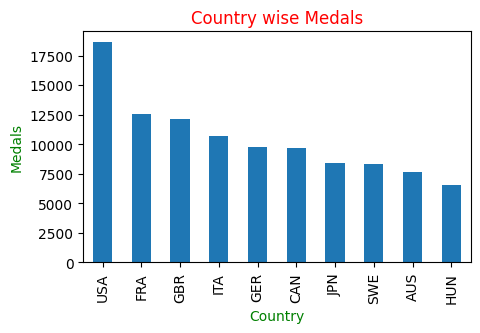

In [42]:
country_most_medals=olympics.groupby(['NOC'])['Medal'].count().sort_values(ascending=False).head(10)
country_most_medals.plot(kind='bar', figsize=(5,3))
plt.title('Country wise Medals',color='red')
plt.xlabel('Country',color='green')
plt.ylabel('Medals',color='green')
plt.show()

In [46]:
country_most_gold_medals = olympics[olympics['Medal']=='Gold'].groupby(['Year','NOC','Season'])['Medal'].count()
country_most_gold_medals

Year  NOC  Season
1896  AUS  Summer      2
      AUT  Summer      2
      DEN  Summer      1
      FRA  Summer      5
      GBR  Summer      3
                    ... 
2016  TUR  Summer      1
      UKR  Summer      2
      USA  Summer    139
      UZB  Summer      4
      VIE  Summer      1
Name: Medal, Length: 1112, dtype: int64

In [48]:
athl_avg_age_w_h=olympics.groupby(['Sport','Sex']).agg({'Age':['mean'],'Height':['mean'],'Weight':['mean']}).sort_values(by='Sport')
athl_avg_age_w_h

Age      Height     Weight
                        mean        mean       mean
Sport         Sex                                  
Aeronautics   M    26.000000  175.000000  70.701778
Alpine Skiing F    22.334609  168.960859  64.521633
              M    23.761738  176.999632  76.166028
Alpinism      F    43.000000  175.000000  70.701778
              M    33.083333  175.000000  70.701778
...                      ...         ...        ...
Water Polo    M    25.633115  183.083383  82.024537
Weightlifting F    24.028078  160.561555  67.724622
              M    25.609384  170.711572  79.883431
Wrestling     F    25.305921  163.865132  60.587835
              M    25.691241  173.432701  74.863195

[116 rows x 3 columns]

In [50]:
popular_event=olympics.groupby(['Year','Sport','Event','City'])['ID'].nunique().sort_values(ascending=False).head(1)
popular_event

Year  Sport       Event                        City          
2002  Ice Hockey  Ice Hockey Men's Ice Hockey  Salt Lake City    312
Name: ID, dtype: int64

In [54]:
popular_event_medals=olympics[(olympics['Year']==2002) & (olympics['Event']=="Ice Hockey Men's Ice Hockey")].groupby(['NOC'])
popular_event_medals.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
28,9,Antti Sami Aalto,M,26.0,186.0,96.0,Finland,FIN,2002 Winter,2002,Winter,Salt Lake City,Ice Hockey,Ice Hockey Men's Ice Hockey,0
1050,586,Tobias Abstreiter,M,31.0,178.0,85.0,Germany,GER,2002 Winter,2002,Winter,Salt Lake City,Ice Hockey,Ice Hockey Men's Ice Hockey,0
1896,1044,David Aebischer,M,24.0,186.0,85.0,Switzerland,SUI,2002 Winter,2002,Winter,Salt Lake City,Ice Hockey,Ice Hockey Men's Ice Hockey,0
1926,1062,Jean-Jacques Aeschlimann,M,34.0,186.0,86.0,Switzerland,SUI,2002 Winter,2002,Winter,Salt Lake City,Ice Hockey,Ice Hockey Men's Ice Hockey,0
1962,1085,Maksim Sergeyevich Afinogenov,M,22.0,183.0,88.0,Russia,RUS,2002 Winter,2002,Winter,Salt Lake City,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112502,56971,"Dieter Kalt, Jr.",M,27.0,175.0,83.0,Austria,AUT,2002 Winter,2002,Winter,Salt Lake City,Ice Hockey,Ice Hockey Men's Ice Hockey,0
112539,56993,Aleksey Nikolayevich Kalyuzhny,M,24.0,178.0,79.0,Belarus,BLR,2002 Winter,2002,Winter,Salt Lake City,Ice Hockey,Ice Hockey Men's Ice Hockey,0
113268,57372,Richard Kapu,M,29.0,182.0,92.0,Slovakia,SVK,2002 Winter,2002,Winter,Salt Lake City,Ice Hockey,Ice Hockey Men's Ice Hockey,0
113910,57700,Ihor Vasylovych Karpenko,M,25.0,172.0,77.0,Ukraine,UKR,2002 Winter,2002,Winter,Salt Lake City,Ice Hockey,Ice Hockey Men's Ice Hockey,0


In [55]:
# First Modern Olympic Season 1896

In [56]:
# first season data:
first_season=olympics[olympics['Year']==1896]
first_season.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
3079,1724,Aristidis Akratopoulos,M,24.0,175.0,70.701778,Greece,GRE,1896 Summer,1896,Summer,Athina,Tennis,Tennis Men's Singles,0
3080,1724,Aristidis Akratopoulos,M,24.0,175.0,70.701778,Greece-3,GRE,1896 Summer,1896,Summer,Athina,Tennis,Tennis Men's Doubles,0


<AxesSubplot: xlabel='Age', ylabel='Count'>

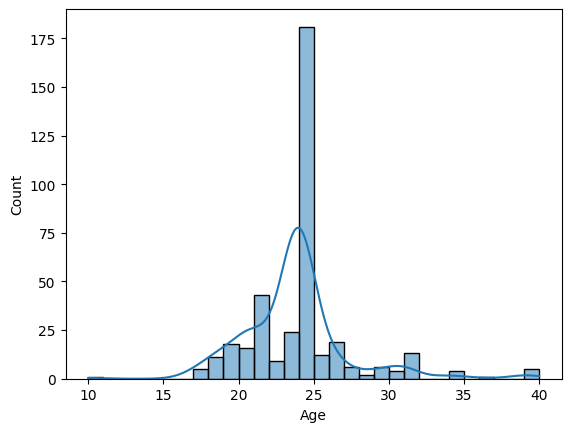

In [58]:
# age distribution in the first modern olymipc season
sns.histplot(first_season['Age'],bins=30, kde=True)

<AxesSubplot: xlabel='Height', ylabel='Count'>

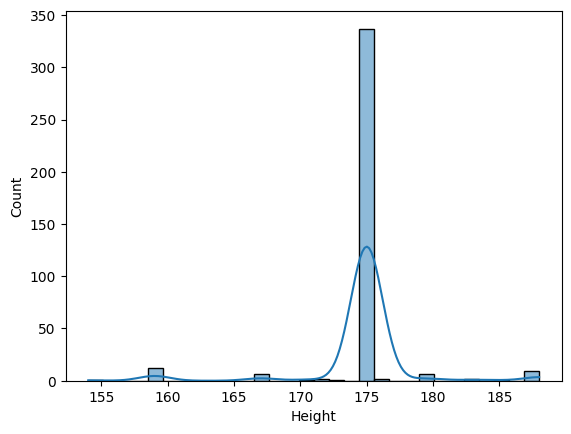

In [59]:
# height distribution in the first modern olympic season:
sns.histplot(first_season['Height'],bins=30, kde=True)

<AxesSubplot: xlabel='Weight', ylabel='Count'>

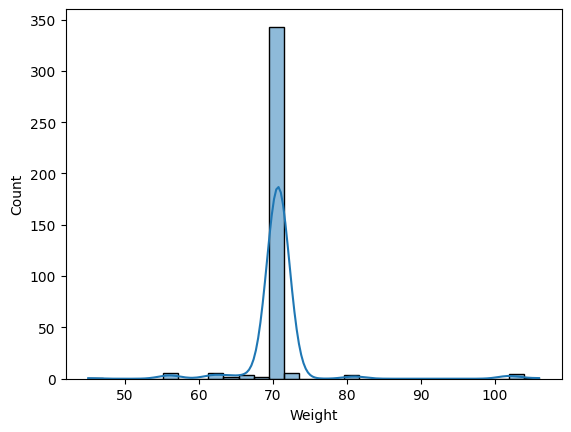

In [60]:
# weight distribution in the first modern olympic season:
sns.histplot(first_season['Weight'],bins=30, kde=True)

In [61]:
# identify countries that participated on the first season:
first_season['NOC'].unique()

array(['GRE', 'GBR', 'SUI', 'USA', 'GER', 'FRA', 'HUN', 'AUS', 'AUT',
       'DEN', 'ITA', 'SWE'], dtype=object)

In [62]:
# number of countries that participated on the first season:
len(first_season['NOC'].unique())

12

In [63]:
 # number of atheletes paricipated on the first season:
 first_season['ID'].nunique()

176

In [64]:
 # identify the sports held on 1896 season:
first_season['Sport'].unique()

array(['Tennis', 'Athletics', 'Swimming', 'Gymnastics', 'Shooting',
       'Cycling', 'Fencing', 'Weightlifting', 'Wrestling'], dtype=object)

In [65]:
# identify the  sports events held on 1896 season:
first_season['Event'].unique()

array(["Tennis Men's Singles", "Tennis Men's Doubles",
       "Athletics Men's 110 metres Hurdles",
       "Swimming Men's 1,200 metres Freestyle",
       "Gymnastics Men's Rope Climbing",
       "Swimming Men's 100 metres Freestyle",
       "Shooting Men's Free Rifle, Three Positions, 300 metres",
       "Cycling Men's Road Race, Individual",
       "Cycling Men's 333 metres Time Trial",
       "Cycling Men's 100 kilometres",
       "Shooting Men's Military Rifle, 200 metres",
       "Athletics Men's Marathon", "Athletics Men's 1,500 metres",
       "Gymnastics Men's Horse Vault", "Gymnastics Men's Parallel Bars",
       "Gymnastics Men's Parallel Bars, Teams",
       "Gymnastics Men's Horizontal Bar",
       "Gymnastics Men's Horizontal Bar, Teams", "Gymnastics Men's Rings",
       "Gymnastics Men's Pommelled Horse", "Athletics Men's 100 metres",
       "Athletics Men's 400 metres", "Fencing Men's Foil, Individual",
       "Athletics Men's High Jump", "Athletics Men's Long Jump",
   

In [67]:
# identify the  sports events held on 1896 season number:
len(first_season['Event'].unique())

43

In [68]:
# country that won most  medals 1896
country_most_medals_1896=first_season.groupby(['NOC'])['Medal'].count().sort_values(ascending=False)
country_most_medals_1896

NOC
GRE    148
GER     94
USA     27
FRA     26
GBR     25
HUN     18
DEN     15
AUT      8
SUI      8
AUS      5
SWE      5
ITA      1
Name: Medal, dtype: int64

In [69]:
# country that won the most gold medals 1896:
country_most_gold_medals_1896=first_season[first_season['Medal']=='Gold'].groupby(['NOC'])['Medal'].count().sort_values(ascending=False)
country_most_gold_medals_1896

NOC
GER    25
USA    11
GRE    10
FRA     5
GBR     3
AUS     2
AUT     2
HUN     2
DEN     1
SUI     1
Name: Medal, dtype: int64

In [71]:
 # 1896 season avrg age, weight and height by sport and gender:
athl_avg_age_w_h_1896=first_season.groupby(['Sport','Sex']).agg({'Age':['mean'],'Height':['mean'],'Weight':['mean']})
athl_avg_age_w_h_1896

,,Age,Height,Weight
,,mean,mean,mean
Sport,Sex,,,
Athletics,M,22.981132,174.962264,70.528650
Cycling,M,23.414634,175.000000,70.701778
Fencing,M,23.066667,175.000000,70.701778
Gymnastics,M,24.216495,173.896907,70.283977
Shooting,M,25.953846,175.000000,70.701778
Swimming,M,21.944444,175.000000,70.701778
Tennis,M,22.130435,175.000000,70.701778
Weightlifting,M,22.900000,176.000000,76.891245


In [72]:
# modern olympic seasons held by france data:
france_olympic_host = olympics[olympics['City'].isin(['Paris', 'Grenoble', 'Chamonix', 'Albertville'])]
france_olympic_host .head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
3,4,Edgar Lindenau Aabye,M,34.0,175.0,70.701778,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.000000,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,0


In [73]:
# France's modern olympic seasons
france_olympic_host['Games'].unique()

array(['1900 Summer', '1992 Winter', '1924 Summer', '1968 Winter',
       '1924 Winter'], dtype=object)

In [74]:
# year ,season and number of participated countries, athletes by gender:
france_olympic_host.groupby(['Year','Season','City','Sex'])[['ID','NOC']].nunique().reset_index()

,Year,Season,City,Sex,ID,NOC
0,1900,Summer,Paris,F,23,6
1,1900,Summer,Paris,M,1201,31
2,1924,Summer,Paris,F,156,22
3,1924,Summer,Paris,M,3100,45
4,1924,Winter,Chamonix,F,13,8
5,1924,Winter,Chamonix,M,300,19
6,1968,Winter,Grenoble,F,211,27
7,1968,Winter,Grenoble,M,949,37
8,1992,Winter,Albertville,F,488,45
9,1992,Winter,Albertville,M,1313,63


In [75]:
# most medals in all French sessions olympic Games:
france_country_most_medals=france_olympic_host.groupby(['NOC'])['Medal'].count().sort_values(ascending=False).head(5)
france_country_most_medals

NOC
FRA    1959
USA    1004
GBR     772
ITA     646
SWE     572
Name: Medal, dtype: int64

In [76]:
# popular event in france olympic games:
france_popular_event=france_olympic_host.groupby(['Year','City','Sport','Event'])['ID'].count().sort_values(ascending=False).head(1)
france_popular_event

Year  City   Sport     Event                  
1924  Paris  Football  Football Men's Football    279
Name: ID, dtype: int64